# Finding the Best Two Markets to Advertise In For an E-Learning Product

We are working for an e-learning company that offers courses on programming. Our company mostly covers web and mobile development, but we also cover many other domains, like data science, game development, etc. 

In order to promote our product we'd like to invest in advertising. Our goal in this project is to find the two best markets to advertise our product in.

Organizing surveys for different markets is costly. Therefore, we will search existing data that might be relevant for our purpose. We'll use the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development and is one of the leading e-learning resources next to Stack Overflow. Their survey attracted over 31,000 participants, where they answered questions regarding their background and journey towards becoming programmers.

The survey data is publicly available [here](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
# Import libraries we'll be using
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import std

# Read in the data
survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)

# Displays graphs in the notebook
%matplotlib inline 

# Quick exploration of the dataset
print('There are ' + str(survey.shape[0]) + ' rows and ' + str(survey.shape[1]) + ' columns')
pd.options.display.max_columns = 150 # to avoid truncated output 
survey.head()

There are 18175 rows and 136 columns


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

## Checking for sample representativity
As we mentioned earlier, most of the courses we offer are on web and mobile development, but we also cover many other domains, like data science, game development, etc. For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located.
* What the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [2]:
# Generate frequency distribution table for JobRoeInterest column
survey['JobRoleInterest'].value_counts(normalize=True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                                                

We can see from the table that:
* Many people are interested in web development (Full-Stack, Front-End, Back-End)
* A few people are interested in mobile development
* A few people are interested domains other than web or mobile development

It's worth noting that many people are interested in more than one subject. It'd be useful to see how many people are interested in a single subject vs many subjects.
To that end, we'll do the following in the next code block:
* Split the `JobRoleInterest` column by ',' to calculate the number of options
    * drop null values first since they cannot be split
* Generate a frequency distribution table showing the number of subject interests

In [3]:
# Drop null values and split each string in the JobRoleInterest column
interests_drop_na = survey['JobRoleInterest'].dropna()
interests = interests_drop_na.str.split(',')

# Calculate the number of interests and generate the frequency distribution table
n_of_interests = interests.apply(lambda subjects: len(subjects))
n_of_interests.value_counts(normalize=True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

About 32% of people are interested in a single niche subject. The remaining 68% majority of people are interested in multiple subjects. Since our company offers courses in various subjects, the fact that people are interested in multiple subjects could be good for us.

Since our company mainly offers courses in web and mobile development, we should investigate the proportion of respondents that are interested in at least one of these subjects.

Web or Mobile Development    86.241419
Other                        13.758581
Name: JobRoleInterest, dtype: float64


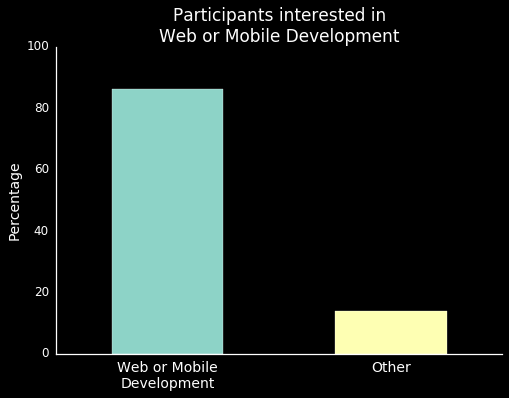

In [4]:
# Generate frequency table of people who are interests in web or mobile development
web_or_mobile = interests_drop_na.str.contains('Web Developer|Mobile Developer')
web_or_mobile_freq = web_or_mobile.value_counts(normalize=True) * 100
web_or_mobile_freq.rename(index={True:'Web or Mobile Development',
                                False:'Other'}, inplace=True)
print(web_or_mobile_freq)

# Graph proportion of participants interested in web or mobile development
sns.set(style="white", context="notebook")
plt.style.use("dark_background")
web_or_mobile_freq.plot.bar(fontsize=12)
plt.title('Participants interested in\nWeb or Mobile Development', size=17)
sns.despine()
plt.xticks([0,1], ['Web or Mobile\nDevelopment', 'Other'], rotation=0, size=14)
plt.ylabel('Percentage', size=14)
plt.ylim([0,100])
plt.show()

A great majority (roughly 86%) of participants are interested in web or mobile development. This figure provides strong evidence that this survey is representative of our population of interest. We want to advertise our courses to all people interested in programming, but mostly those interested in web or mobile development.

Now that we are certain the data will suit our needs, we need to determine:
* Where are these new coders located.
* What the locations with the greatest number of new coders.
* How much money new coders are willing to spend on learning.

##  New Coder Locations and Densities

Because the data set provides information at a country level, we can think of each country as an individual market. This means we can frame our goal as finding the two best countries to advertise in. 

One indicator of a good market is the number of potential customers — the more potential customers in a market, the better. If our ads manage to convince 10% of the 5000 potential customers in market A to buy our product, then this is better than convincing 100% of the 30 potential customers in market B.

We'll work with the `CountryLive` column to determine where these people live at the moment when we run our ads.

In [5]:
# Drop particpants that did not answer what role they are interested in
survey = survey.dropna(subset=['JobRoleInterest'])

# Generate absolute and relative frequency tables for where people live
absolute_freq = survey['CountryLive'].value_counts()
relative_freq = survey['CountryLive'].value_counts(normalize=True) * 100

# Display data in an easy-to-read table
country = pd.DataFrame(data = {'Number of people': absolute_freq, 
                     'Percentage': relative_freq}
                      )
country.head(5)

,Number of people,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765


A great majority of survey particpants (~45.6%) live in the United States of America. India comes in second with 7.7%, followed by 4.6% from the United Kingdom and 3.8% from Canada.

While this is useful information, we need to do a more in-depth analysis to figure out how much money people are willing to spend on learning. There's no use marketing to groups of people that are more interested in free learning resources.

## How Much Money are New Coders Willing to Spend?

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narow down our analysis to only four countries: the US, India, the UK, and Canada. We do this for two reasons:
* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

We'll create a new column, `MoneyPerMonth`, to calculate how much money respondants are paying per month on learning.

In [6]:
# Replace 0's with 1's to avoid dividing by 0
survey['MonthsProgramming'].replace(0, 1, inplace=True)

# Create a column to calculate the amount of money respondants spend per month on learning
survey['MoneyPerMonth'] = survey['MoneyForLearning'] / survey['MonthsProgramming']

# Show the number of null values
print('There are ' + str(survey['MoneyPerMonth'].isnull().sum()) +
      ' null values in the new \'MoneyPerMonth\' column')

There are 675 null values in the new 'MoneyPerMonth' column


We'll only keep rows that have values for the new `MoneyPerMonth` column.

In [7]:
# Drop all rows with null values in the MoneyPerMonth column
survey.dropna(subset=['MoneyPerMonth'], inplace=True)

We want to group the data by country, and then measure the average amount of money that students spend per month in each country. First, let's remove the rows having null values for the CountryLive column, and check out if we still have enough data for the four countries that interest us.

In [8]:
# Drop all rows with null values in the CountryLive column
survey.dropna(subset=['CountryLive'], inplace=True)

# Check if we have enough data with a frequency table
survey['CountryLive'].value_counts().head(4)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

It looks like we still have enough data. We'll proceed to calculate the average amount of money spent per month on learning by country.

In [15]:
# Calculate the mean, median, and mode for the amount of money spent by students per month in each country
countries_mean = survey.pivot_table(values='MoneyPerMonth', index='CountryLive', 
                                    aggfunc=('mean', 'median', lambda x: x.mode())).round(1)
four_countries = countries_mean.loc[['United States of America', 'India',
                                     'United Kingdom', 'Canada']].reset_index()
four_countries.rename(columns={'<lambda>':'mode', 'CountryLive': 'Country'}, inplace=True)
four_countries

,Country,mode,mean,median
0,United States of America,0,228.0,3.3
1,India,0,135.1,0.0
2,United Kingdom,0,45.5,0.0
3,Canada,0,113.5,0.0


The median and mode tell us that each country's distrbution for money spent per month is right skewed, and that at least half of their respondents didn't spend any money on learning.

The results for the UK and Canada are a bit surprising relative to the mean value we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)), we'd intuitively expect people in the UK and Canada to spend more on average on learning than people in India. 

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct. 

We'll search for outliers in the data next.

## Extreme Outliers in the Data

We will use box plots to visualize the amount of money each respondent spent per month for each country.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



([<matplotlib.axis.XTick at 0x7fca550e9f60>,
 <a list of 4 Text xticklabel objects>)

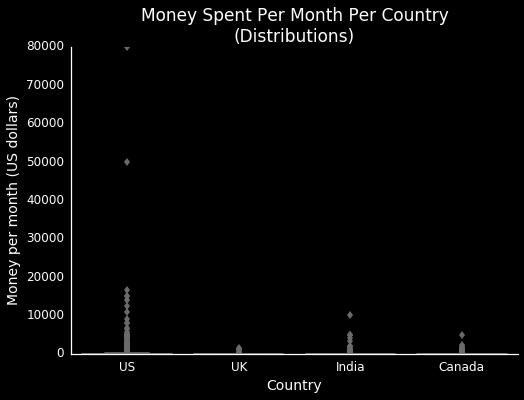

In [10]:
# Isolate only the data for the 4 countries/markets we're interested in
markets = survey[survey['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')].copy()

# Plot the distributions for money spent per month by country
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = markets,
           fliersize='6')
sns.despine()
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 17)
plt.ylabel('Money per month (US dollars)', size=14)
plt.xlabel('Country', size=14)
plt.yticks(size=12)
plt.xticks(range(4), 
           ['US', 'UK', 'India', 'Canada'], size=12) # avoids tick labels overlap


We'll remove the obvious outliers in the data (like those points >20000 in the US) along with any other outliers by calculating grouped z-scores for `MoneyPerMonth` by country.
To do this, we'll:
* Calculate the mean and standard deviation for the amount of money spent per month for each country.
* Calculate the grouped z-scores using each country's mean and standard deviation.
* Assign the z-scores to a new column, `Grouped_Z_MoneyPerMonth`.
* Filter our data to include only participants with z-scores less than plus or minus 3

In [11]:
# Calculate grouped by country z-scores for money spent per month
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
for c in countries:
    mean = markets[markets['CountryLive'] == c]['MoneyPerMonth'].mean()
    stdev = markets[markets['CountryLive'] == c]['MoneyPerMonth'].std(ddof=1)
    markets.loc[markets['CountryLive'] == c, 'Grouped_Z_MoneyPerMonth'] = \
    markets.loc[markets['CountryLive'] == c, 'MoneyPerMonth'].apply(
    lambda x:(x - mean) / stdev)
    
print(str(sum(abs(markets['Grouped_Z_MoneyPerMonth']) > 3)) + ' rows will be removed.')

29 rows will be removed.


In [12]:
# Remove all rows with z-scores greater than 3
markets = markets[abs(markets['Grouped_Z_MoneyPerMonth']) < 3]

# Check how many data points we removed from each country
survey['CountryLive'].value_counts().head(4) - markets['CountryLive'].value_counts().head()

United States of America    13
India                        6
United Kingdom               5
Canada                       5
Name: CountryLive, dtype: int64

We removed a total of 29 outliers with absolute values of z-scores greater than 3 and till have plenty of data to go on.

Now that we've removed the outliers, we'll recalculate the mean and generate the final boxplots.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



CountryLive
Canada                       62.363676
India                        65.758763
United Kingdom               25.245838
United States of America    142.654608
Name: MoneyPerMonth, dtype: float64

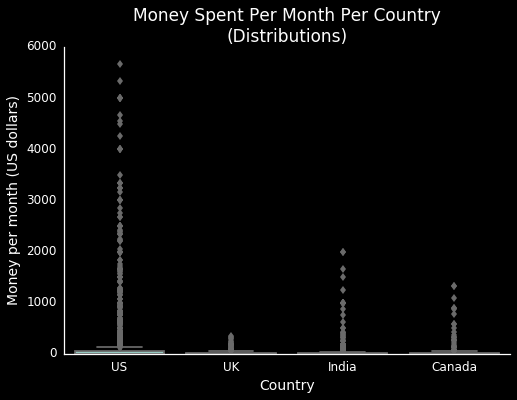

In [13]:
# Plot the distributions for money spent per month by country
sns.boxplot(y = 'MoneyPerMonth', x = 'CountryLive', data = markets,
           fliersize='6')
sns.despine()
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 17)
plt.ylabel('Money per month (US dollars)', size=14)
plt.xlabel('Country', size=14)
plt.yticks(size=12)
plt.xticks(range(4), 
           ['US', 'UK', 'India', 'Canada'], size=12) # avoids tick labels overlap

# Calculate the mean amount of money spent per month by respondents in each country
markets.groupby('CountryLive').mean()['MoneyPerMonth']

## Choosing the Two Best Markets to Advertise in

It's obvious that we should definitely advertise in the US. There are lots of new coders there and they are willing to spend a good amount on learning on average (~$143).

As for the second market to advertise, the data strongly suggests that we shouldn't advertise in the UK since they only spend about \\$25 a month on average and we sell subscriptions at \$59 a month.

So should we advertise in India or Canada?

In [14]:
# Calculate the mean amount of money spent by respondents per month by country
markets['CountryLive'].value_counts(normalize=True) * 100

United States of America    75.141534
India                       11.760165
United Kingdom               7.050952
Canada                       6.047349
Name: CountryLive, dtype: float64

The average monthly expenditure on learning in India is only slighty higher than Canada (roughly \$65.7 vs. ~$62.4). The two are similar. However, the data suggests we have nearly twice as many available customers in India than we have in Canada.

The average amount spent monthly in Canada does exceed our monthly subscription fee amount, so we shouldn't rull out Canada completely.

We have several options:
1. We split the advertising budget between the US, India, and Canada
    * 60% US, 25% India, 15% Canada
    * 70% US, 20% India, 10% Canada
    * 50% US, 30% India, 20% Canada; etc.
2. We advertise in two countries as planned, the US and Canada or the US and India.
    * 70% US, 30% India
    * 65% US, 35% Canada; etc.
3. We advertise only in the US.

It's probably best to send our analysis to the marketing team  and let them use their domain knowledge to take the best decision. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion

In this project, we analyzed survey data from freeCodeCamp about new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in. 

For the second best market, India seems like the better choice but Canada remains as a viable choice. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.